# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [16]:
# Checking the number of mice.
num_mice = merge_df["Mouse ID"].nunique()
num_mice

249

In [17]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = merge_df.loc[merge_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
dup_mice

array(['g989'], dtype=object)

In [18]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_micedf = pd.DataFrame(dup_mice)
dup_micedf

,0
0,g989


In [19]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df[merge_df['Mouse ID'].isin(dup_mice)==False]
clean_df.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [20]:
# Checking the number of mice in the clean DataFrame.
num_mice = clean_df["Mouse ID"].nunique()
num_mice

248

## Summary Statistics

In [21]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
clean_df.describe()
mean = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).mean()
median = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).median()
var = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).var()
std = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).std()
sem = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({"Mean":mean,
                           "Median":median,
                           "Variance":var,
                           "Standard Deviation":std,
                           "SEM":sem})

summary_df.head()

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [22]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_agg = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

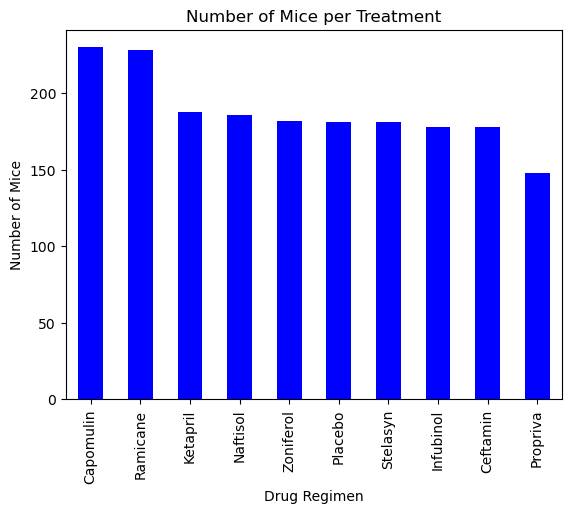

In [23]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_count = clean_df["Drug Regimen"].value_counts()
mice_count

# bar plot
plot_pandas = mice_count.plot.bar(color='b') 

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Treatment")

plt.show()

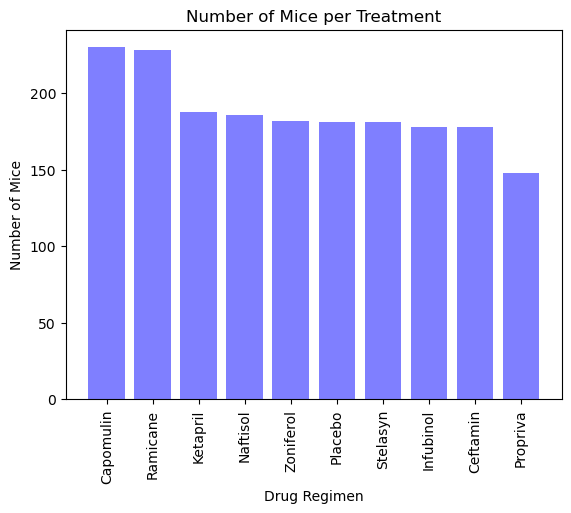

In [24]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# set x_axis, y_axis and tick locations
x_axis = mice_count.index.values
y_axis = y_axis = mice_count.values
tick_locations = [value for value in x_axis]

# bar plot
plt.bar(x_axis, y_axis, color='b', alpha=0.5, align='center')
plt.xticks(tick_locations, rotation = 'vertical')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Treatment")
plt.show()

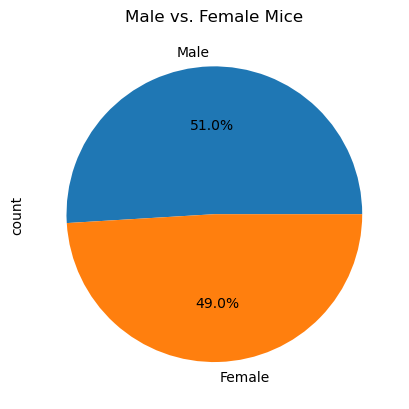

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mf = clean_df['Sex'].value_counts()
plt.title("Male vs. Female Mice")
plot = mf.plot.pie(autopct= "%1.1f%%")


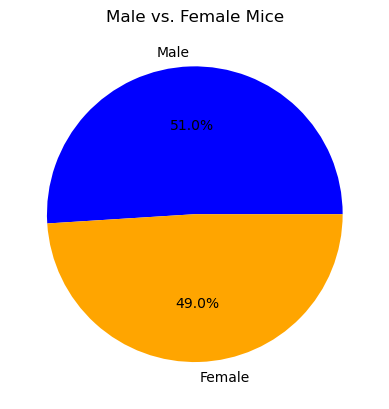

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# labels, sizes, colors
labels = ["Male", "Female"]
sizes = [51.0, 49.0]
colors = ["blue", "orange"]

# pie plot
plt.title("Male vs. Female Mice")
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=0)
plt.show()

## Quartiles, Outliers and Boxplots

In [27]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
cap_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
ram_df = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane", :]
inf_df = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol", :]
cef_df = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
#cap
cap_last = cap_df.groupby('Mouse ID').max()['Timepoint']
cap_vol = pd.DataFrame(cap_last)
cap_merge = pd.merge(cap_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
cap_merge.head()




,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [28]:
# ram
ram_last = ram_df.groupby('Mouse ID').max()['Timepoint']
ram_vol = pd.DataFrame(ram_last)
ram_merge = pd.merge(ram_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
ram_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [29]:
# inf
inf_last = inf_df.groupby('Mouse ID').max()['Timepoint']
inf_vol = pd.DataFrame(inf_last)
inf_merge = pd.merge(inf_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
inf_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [30]:
# cef
cef_last = cef_df.groupby('Mouse ID').max()['Timepoint']
cef_vol = pd.DataFrame(cef_last)
cef_merge = pd.merge(cef_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
cef_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [31]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# cap
cap_tumors = cap_merge["Tumor Volume (mm3)"]
cap_quartiles = cap_tumors.quantile([0.25, 0.5, 0.75])
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq-cap_lowerq
#outliers
cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)
print(f"Values below {cap_lower_bound} could be outliers for Capomulin.")
print(f"Values above {cap_upper_bound} could be outliers for Capomulin.")

#ram
ram_tumors = ram_merge["Tumor Volume (mm3)"]
ram_quartiles = ram_tumors.quantile([0.25, 0.5, 0.75])
ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
ram_iqr = ram_upperq-ram_lowerq
#outliers
ram_lower_bound = ram_lowerq - (1.5*ram_iqr)
ram_upper_bound = ram_upperq + (1.5*ram_iqr)
print(f"Values below {ram_lower_bound} could be outliers for Ramicane.")
print(f"Values above {ram_upper_bound} could be outliers for Ramicane.")

# inf
inf_tumors = inf_merge["Tumor Volume (mm3)"]
inf_quartiles = inf_tumors.quantile([0.25, 0.5, 0.75])
inf_lowerq = inf_quartiles[0.25]
inf_upperq = inf_quartiles[0.75]
inf_iqr = inf_upperq-inf_lowerq
#outliers
inf_lower_bound = inf_lowerq - (1.5*inf_iqr)
inf_upper_bound = inf_upperq + (1.5*inf_iqr)
print(f"Values below {inf_lower_bound} could be outliers for Infubinol.")
print(f"Values above {inf_upper_bound} could be outliers for Infubinol.")

# cef
cef_tumors = cef_merge["Tumor Volume (mm3)"]
cef_quartiles = cef_tumors.quantile([0.25, 0.5, 0.75])
cef_lowerq = cef_quartiles[0.25]
cef_upperq = cef_quartiles[0.75]
cef_iqr = cef_upperq-cef_lowerq
#outliers
cef_lower_bound = cef_lowerq - (1.5*cef_iqr)
cef_upper_bound = cef_upperq + (1.5*cef_iqr)
print(f"Values below {cef_lower_bound} could be outliers for Ceftamin.")
print(f"Values above {cef_upper_bound} could be outliers for Ceftamin.")
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset 
    
    # Determine outliers using upper and lower bounds

Values below 20.70456164999999 could be outliers for Capomulin.
Values above 51.83201549 could be outliers for Capomulin.
Values below 17.912664470000003 could be outliers for Ramicane.
Values above 54.30681135 could be outliers for Ramicane.
Values below 36.83290494999999 could be outliers for Infubinol.
Values above 82.74144559000001 could be outliers for Infubinol.
Values below 25.355449580000002 could be outliers for Ceftamin.
Values above 87.66645829999999 could be outliers for Ceftamin.


In [43]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# # Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drugs = merge_df[merge_df["Drug Regimen"].isin(treatments)]
drugs.head()

# # Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drugs = merge_df[merge_df["Drug Regimen"].isin(drug_list)]
# drugs.head()

# # Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# make sure we are getting last timepoint
last_timepoint = drugs.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_size=("Tumor Volume (mm3)", lambda x: x.iloc[-1]))
last_timepoint = last_timepoint.stack(level=0).unstack(level=0)
last_timepoint = last_timepoint.rename(columns={'Timepoint': 'Max Timepoint'})
for drug in drug_list:
    print(drug)
    
infu = drugs.loc[drugs["Drug Regimen"]=="Infubinol"]
infu["Tumor Volume (mm3)"].min()

Capomulin
Ramicane
Infubinol
Ceftamin


36.3213458

In [33]:
# Step 1: Create a grouped DataFrame that shows the last (greatest) time point for each mouse
max_timepoint_df = clean_df.groupby(['Mouse ID'])['Timepoint'].max().reset_index()
max_timepoint_df = max_timepoint_df.rename(columns={'Timepoint': 'Max Timepoint'})

# print(max_timepoint_df)

# Merge the max timepoint DataFrame with the original cleaned DataFrame
merged_data = pd.merge(clean_df, max_timepoint_df, on='Mouse ID')
merged_data.reset_index()

# Step 2: Create a list that holds the treatment names as well as a second, empty list to hold the tumor volume data
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_volume_data = []



In [64]:
# Step 3: Loop through each drug in the treatment list, locating the rows in the merged DataFrame that correspond to each treatment. Append the resulting final tumor volumes for each drug to the empty list.
for drug in treatment_list:
    drug_data = merged_data.loc[merged_data['Drug Regimen'] == drug]
    final_tumor_volume = drug_data.loc[drug_data['Timepoint'] == drug_data['Max Timepoint']]['Tumor Volume (mm3)']
    tumor_volume_data.append(final_tumor_volume)
    quartiles = last_timepoint[drug].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = (lowerq - (1.5*iqr))
    upper_bound = (upperq + (1.5*iqr))
    
    if treatment == 0:
        print(f"------------------------------------------------------------")
    print(f"The lower quartile of {drug} treatments is: {lowerq}")
    print(f"The upper quartile of {drug} treatments is: {upperq}")
    print(f"The interquartile range of {drug} treatments is: {iqr}")
    print(f"Values below {lower_bound} could be {drug} outliers.")
    print(f"Values above {upper_bound} could be {drug} outliers.")
    print(f"------------------------------------------------------------")
#     treatment+=1
# outliers
# for drug in drug_list:
    outliers_count = (final_tumor_volume.loc[(final_tumor_volume >= upper_bound) | 
                                        (final_tumor_volume <= lower_bound)]).count()
    print(f'Number of {drug} outliers: {outliers_count}')
    treatment+=1


The lower quartile of Capomulin treatments is: 32.37735684
The upper quartile of Capomulin treatments is: 40.1592203
The interquartile range of Capomulin treatments is: 7.781863460000004
Values below 20.70456164999999 could be Capomulin outliers.
Values above 51.83201549 could be Capomulin outliers.
------------------------------------------------------------
Number of Capomulin outliers: 0
The lower quartile of Ramicane treatments is: 31.56046955
The upper quartile of Ramicane treatments is: 40.65900627
The interquartile range of Ramicane treatments is: 9.098536719999998
Values below 17.912664470000003 could be Ramicane outliers.
Values above 54.30681135 could be Ramicane outliers.
------------------------------------------------------------
Number of Ramicane outliers: 0
The lower quartile of Infubinol treatments is: 54.04860769
The upper quartile of Infubinol treatments is: 65.52574285
The interquartile range of Infubinol treatments is: 11.477135160000003
Values below 36.83290494999

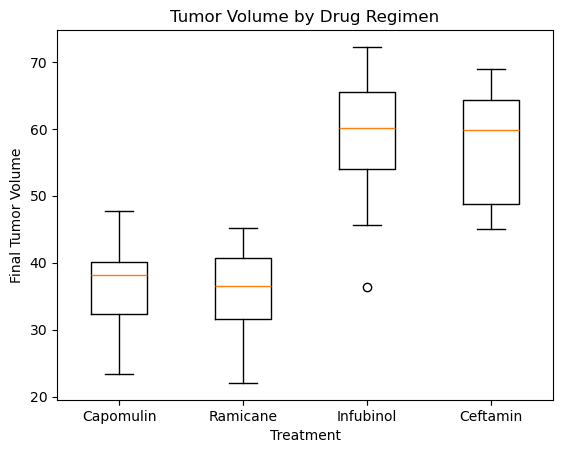

In [65]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
boxplot_list = []
for drug in drug_list:
    boxplot_list.append(list(last_timepoint[drug].dropna()))
    
# Generate a box plot of the final tumor volume for each treatment
fig = plt.figure()
plt.xlabel("Treatment")
labels = ["Capomulin" , "Ramicane", "Infubinol", "Ceftamin"]
plt.xticks([1,2,3,4], drug_list, rotation=0)
plt.ylabel("Final Tumor Volume")
plt.title("Tumor Volume by Drug Regimen")
plt.boxplot(boxplot_list, labels = labels)
plt.show()

## Line and Scatter Plots

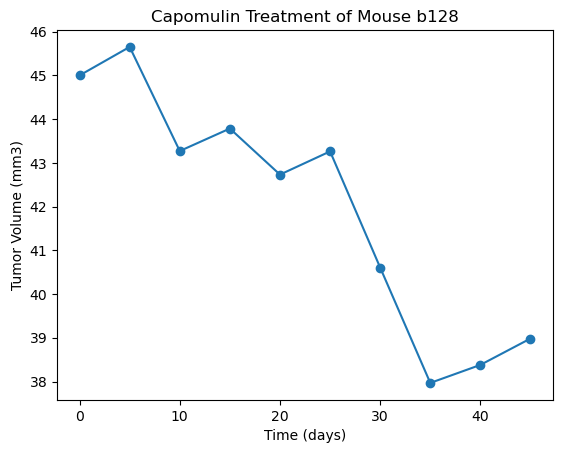

In [66]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# identify mouse
cap_mouse = clean_df.loc[clean_df['Mouse ID'] == 'b128']

#plot
plt.plot(cap_mouse["Timepoint"], cap_mouse["Tumor Volume (mm3)"], marker = 'o')
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse b128")

plt.show()

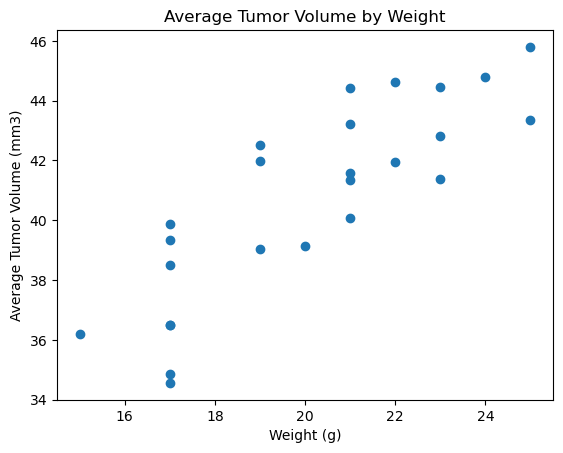

In [67]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Find average tumor volume for each mouse

avg_vol_df = pd.DataFrame(cap_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})

# Merge average tumor volume onto data_df and drop duplicates
avg_vol_df = pd.merge(cap_df, avg_vol_df, on='Mouse ID')
final_avg_vol_df = avg_vol_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_avg_vol_df

x = final_avg_vol_df['Weight (g)']
y = final_avg_vol_df['avg_tumor_vol']

# Create a scatter plot based on new dataframe above with circle markers and listed colors
plt.scatter(x, y)

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
# Display plot
plt.show()


## Correlation and Regression

The correlation between weight and average tumor volume
on the Capomulin regimen is 0.84.


Text(20, 37, 'y = 0.95x + 21.55')

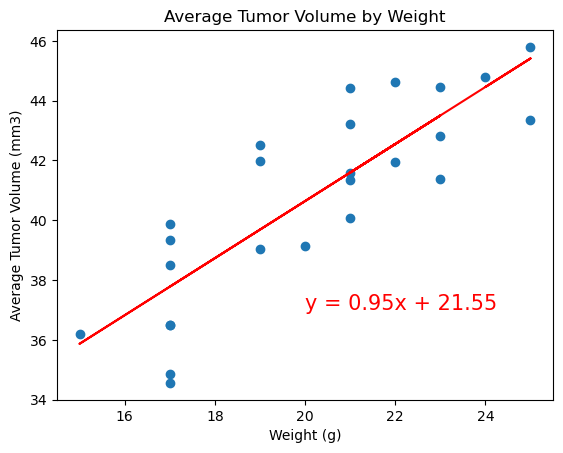

In [68]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(x,y)

print(f"""The correlation between weight and average tumor volume
on the Capomulin regimen is {round(correlation[0],2)}.""")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.scatter(x,y)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
plt.plot(x,regress_values,"r-")

# Annotate linear regression
plt.annotate(line_eq,(20,37),fontsize=15,color="red")